<a href="https://colab.research.google.com/github/ali-chaudhry8/Deep-Representations-and-Learning/blob/main/COMP0188_Lab10_CGAN_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### Import data from google co-lab ###
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


4/4 [==============================] - 1s 106ms/step


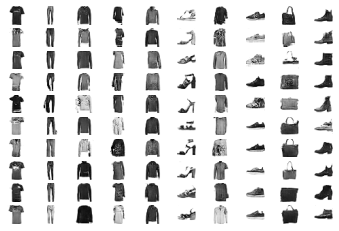

In [5]:
# example of loading the generator model and generating images
import numpy as np
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
import matplotlib.pyplot as plt

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_input = x_input.reshape(n_samples, latent_dim)
  # generate labels
  labels = randint(0, n_classes, n_samples)
  return [z_input, labels]

# create and save a plot of generated images
def save_plot(examples, n):
  # plot images
  for i in range(n * n):
    # define subplot
    plt.subplot(n, n, 1 + i)
    # turn off axis
    plt.axis("off")
    # plot raw pixel data
    plt.imshow(examples[i, :, :, 0], cmap="gray_r")
  #plt.show()
  plt.savefig("/content/gdrive/MyDrive/Colab Notebooks/GAN_model/cgan_generator_100.png", dpi=300)

# load model
model = load_model("/content/gdrive/MyDrive/Colab Notebooks/GAN_model/cgan_generator.h5")
# generate images
latent_points, labels = generate_latent_points(100, 100)
# specify labels
labels = np.asarray([x for _ in range(10) for x in range(10)])
# generate images
X = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)